# Import


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


#Data preprocessing

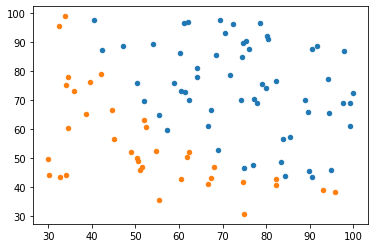

In [3]:
# This part is the same as what we did in Logistic regression project

# Load data from csv file "binary_data.csv"
data = pd.read_csv("binary_data.csv", header=None)

data.isnull()
# We want to drop those rows where some entries are nan
data.dropna(inplace=True)
# Check if they are dropped
data.isnull().sum()

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

ones = data.loc[y == 1]
zeros = data.loc[y == 0]

# Use different color to visualize scatter plot
plt.scatter(ones.iloc[:, 0], ones.iloc[:, 1], s=20)
plt.scatter(zeros.iloc[:, 0], zeros.iloc[:, 1], s=20)
# split the train and validation set randomly in ratio 9:1
train, validation = train_test_split(data, test_size=0.1)


In [ ]:
# Load data from csv file "binary_data.csv"
data = pd.read_csv("binary_data.csv", header=None)

data.isnull()
# We want to drop those rows where some entries are nan
data.dropna(inplace=True)
# Check if they are dropped
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

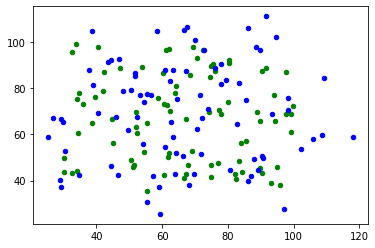

In [4]:
def data_transform(data):
  # Transform the data format to the format that model accepts
  # data frame -> numpy array
  X, y = data.iloc[:, :-1], data.iloc[:, -1]
  X = np.array(X)
  y = np.array(y).reshape(-1,1)
  return X, y

X_train, y_train = data_transform(train)
X_val, y_val = data_transform(validation)

# initializa a Gaussian noise of mean 0, standard deviation 10
np.random.seed(0)
noise = np.random.normal(0,10,X_train.shape)
X_train_noisy = X_train + noise

plt.scatter(X_train[:, 0], X_train[:, 1], s=20, color='g')
plt.scatter(X_train_noisy[:,0], X_train_noisy[:,1], s=20, color='b')

# Model Architecture

## Logistic regression

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, epochs=500000):
      # initialize model parameters, hyperparameters and other variables
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.train_costs = []
      self.val_costs = []
    
    def sigmoid(self, x):
      # Implemente the function of sigmoid
      return 1 / (1 + np.exp(-x))

    def cost(self, h, y):
      # Implemente the cost function
      return np.mean(-y * np.log(h) - (1 - y) * np.log(1 - h))
    
    def fit(self, X, y, X_val, y_val):
      # concat x_0=1 in X for the bias term
      # X = [1, X]
      X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
      y = y.flatten()
      X_val = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)
      y_val = y_val.flatten()
      
      # weights including w,b, are initialized
      # weights = [b, w1, w2]
      self.weights = np.zeros(X.shape[1])
      
      cost_lst = []
      for i in range(self.epochs):
        y_pred = self.sigmoid(np.dot(X, self.weights))
        # compute the gradient with respect to weights
        gradient = np.dot(X.T, (y_pred - y))
        self.weights -= self.learning_rate * gradient/X.shape[0]
        
        cost = self.cost(y_pred, y)
        cost_lst.append([i,cost])

        if i % 100000 == 0:
          # compute cost for validation set
          y_val_pred = self.sigmoid(np.dot(X_val, self.weights))
          val_cost = self.cost(y_val_pred, y_val)
          self.val_costs.append([i, val_cost])

          print('Epoch', i, ': train cost is', cost, ', validation cost is', val_cost)

      self.train_costs = cost_lst
      self.coef_ = self.weights[1:].reshape(1,-1)
      self.intercept_ = self.weights[0].reshape(1,-1)

    def predict(self, X):
      X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
      return self.sigmoid(np.dot(X, self.weights)).round()

## Single neuron + Sigmoid activation

In [6]:
class SingleNeuron:
    def __init__(self, learning_rate=0.001, epochs=500000):
      # initialize model parameters, hyperparameters and other variables
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.train_costs = []
      self.val_costs = []
    
    def sigmoid(self, x):
      # Implement the function of sigmoid
      return 1/(1+np.exp(-x))

    def cost(self, h, y):
      # Implement the cost function
      return -np.mean(y*np.log(h)+(1-y)*np.log(1-h))
    
    def add_noise(self, X):
      noise = np.random.normal(loc=0,scale=10,size=X.shape)
      return X + noise
      
    def forward(self, X):
      # Implement the forward pass from input layer to output layer
      return self.sigmoid(np.dot(X,self.weights))

    def backward(self, X, y, y_pred):
      # Implement the backward pass
      # Calculate the gradient first
      # Update each weights using the gradients
      gradient = -np.dot(X.T,(y-y_pred))
      self.weights -= self.learning_rate * gradient/X.shape[0]

    def fit(self, X, y, X_val, y_val, with_noise=False):
      # concat x_0=1 in X for the bias term
      # X = [1, X]
      X = np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
      y = y.flatten()
      X_val = np.concatenate((np.ones((X_val.shape[0],1)),X_val),axis=1)
      y_val = y_val.flatten()
      
      # weights including w,b, are initialized
      # weights = [b, w1, w2]
      self.weights = np.zeros(X.shape[1])
      
      cost_lst = []
      for i in range(self.epochs):
        if with_noise == True:
          self.add_noise(X)

        y_pred = self.forward(X)
        self.backward(X,y,y_pred)
        
        cost = self.cost(y_pred,y)
        cost_lst.append([i,cost])

        if i % 100000 == 0:
          # compute cost for validation set
          y_val_pred = self.forward(X_val)
          val_cost = self.cost(y_val_pred,y_val)
          self.val_costs.append([i, val_cost])

          print('Epoch', i, ': train cost is', cost, ', validation cost is', val_cost)

      self.train_costs = cost_lst
      self.coef_ = self.weights[1:].reshape(1,-1)
      self.intercept_ = self.weights[0].reshape(1,-1)

    def predict(self, X):
      X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
      return self.forward(X).round()
    
    def plot_cost(self):
      plt.plot(np.array(self.train_costs)[:,0], np.array(self.train_costs)[:,1], color='b')
      plt.plot(np.array(self.val_costs)[:,0], np.array(self.val_costs)[:,1], color='r')
      plt.title('Train Cost Curve', fontsize=16)
      plt.xlabel('epoch', fontsize=14)
      plt.ylabel('cost', fontsize=14)
      plt.show()


# Training and evaluation

In [7]:
# Train your own model with Gaussian noise
logistic = LogisticRegression()
logistic.fit(X_train_noisy, y_train, X_val, y_val)
y_pred = logistic.predict(X_train)
accuracy = accuracy_score(y_train.flatten(), y_pred)
print('The accuracy on training set is {}'.format(accuracy))


Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.5645281257663279
Epoch 100000 : train cost is 0.436000840415554 , validation cost is 0.38832995084940813
Epoch 200000 : train cost is 0.3971345165936951 , validation cost is 0.34228201941623715
Epoch 300000 : train cost is 0.3833305341787036 , validation cost is 0.32349359848746373
Epoch 400000 : train cost is 0.3770627124585763 , validation cost is 0.3139599801456413
The accuracy on training set is 0.8928571428571429


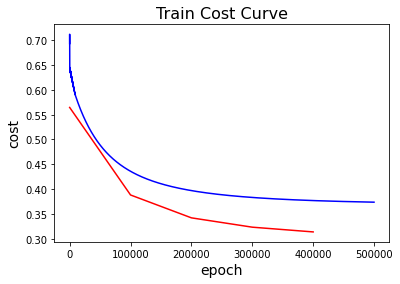

In [8]:
# Visualize the cost of training set and testing set
# Use the model with Gaussian noise
plt.plot(np.array(logistic.train_costs)[:,0], np.array(logistic.train_costs)[:,1], color='b')
plt.plot(np.array(logistic.val_costs)[:,0], np.array(logistic.val_costs)[:,1], color='r')
plt.title('Train Cost Curve', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('cost', fontsize=14)

plt.show()

In [9]:
# Train your own model with Gaussian noise
single_neuron = SingleNeuron()
single_neuron.fit(X_train_noisy, y_train, X_val, y_val)
y_pred = single_neuron.predict(X_train)
accuracy = accuracy_score(y_train.flatten(), y_pred)
print('The accuracy on training set is {}'.format(accuracy))

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.5645281257663279
Epoch 100000 : train cost is 0.436000840415554 , validation cost is 0.38832995084940813
Epoch 200000 : train cost is 0.3971345165936951 , validation cost is 0.34228201941623715
Epoch 300000 : train cost is 0.3833305341787036 , validation cost is 0.32349359848746373
Epoch 400000 : train cost is 0.3770627124585763 , validation cost is 0.3139599801456413
The accuracy on training set is 0.8928571428571429


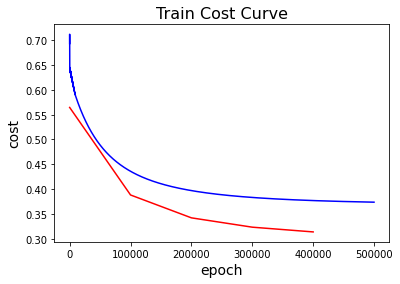

In [10]:
# Visualize the cost of training set and testing set
# Use the model with Gaussian noise
plt.plot(np.array(single_neuron.train_costs)[:,0], np.array(single_neuron.train_costs)[:,1], color='b')
plt.plot(np.array(single_neuron.val_costs)[:,0], np.array(single_neuron.val_costs)[:,1], color='r')
plt.title('Train Cost Curve', fontsize=16)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('cost', fontsize=14)

plt.show()

# Cross Validation

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.46830439987992867
Epoch 100000 : train cost is 0.30877538204331817 , validation cost is 0.3817108234901736
Epoch 200000 : train cost is 0.25690669783513276 , validation cost is 0.3491805724711906
Epoch 300000 : train cost is 0.23628320060349714 , validation cost is 0.3326368807126442
Epoch 400000 : train cost is 0.22534723760116704 , validation cost is 0.3222892267950753
The accuracy on training set 1 is 0.8928571428571429


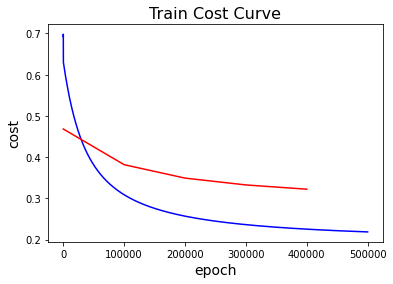

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.7310603447080771
Epoch 100000 : train cost is 0.3282890259116935 , validation cost is 0.2903399993509039
Epoch 200000 : train cost is 0.2797016696390796 , validation cost is 0.2123641710753537
Epoch 300000 : train cost is 0.26003652467992205 , validation cost is 0.1762767512094337
Epoch 400000 : train cost is 0.2494965948321434 , validation cost is 0.15490871889612165
The accuracy on training set 2 is 0.8809523809523809


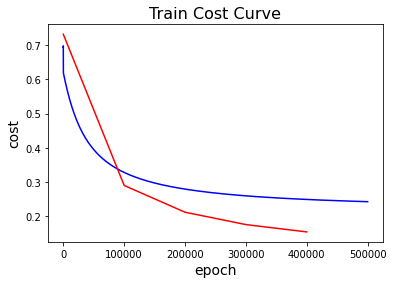

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.44444100402751124
Epoch 100000 : train cost is 0.32830598435520286 , validation cost is 0.2584741129810043
Epoch 200000 : train cost is 0.27997757718648575 , validation cost is 0.19174101142078265
Epoch 300000 : train cost is 0.26067652912993644 , validation cost is 0.15911726322589642
Epoch 400000 : train cost is 0.25040446234427277 , validation cost is 0.1392025040296481
The accuracy on training set 3 is 0.8690476190476191


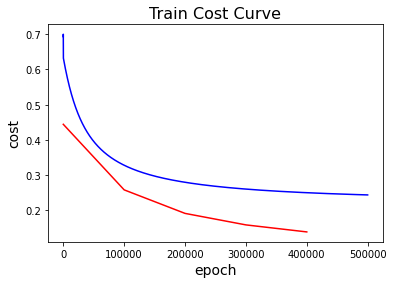

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.5624457054616714
Epoch 100000 : train cost is 0.3193453582954127 , validation cost is 0.3236079725394177
Epoch 200000 : train cost is 0.26565693559591685 , validation cost is 0.2914818526542663
Epoch 300000 : train cost is 0.24357812958074354 , validation cost is 0.2805671636963713
Epoch 400000 : train cost is 0.23159194965653024 , validation cost is 0.2756813990881508
The accuracy on training set 4 is 0.8928571428571429


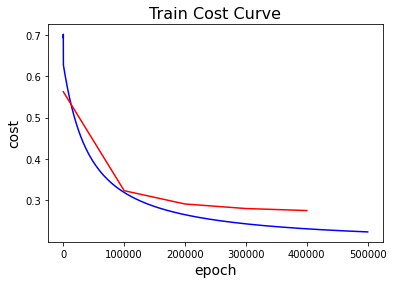

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.5713017912589116
Epoch 100000 : train cost is 0.32702886272871906 , validation cost is 0.26797443204709276
Epoch 200000 : train cost is 0.274696220391752 , validation cost is 0.22111643630133443
Epoch 300000 : train cost is 0.25358433441724293 , validation cost is 0.20060078295266148
Epoch 400000 : train cost is 0.24230016345148245 , validation cost is 0.1887114585979164
The accuracy on training set 5 is 0.8941176470588236


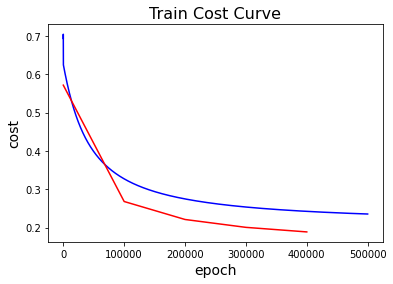

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 1.0202344007480464
Epoch 100000 : train cost is 0.3164264884086164 , validation cost is 0.39885225730588325
Epoch 200000 : train cost is 0.2636952567991478 , validation cost is 0.3470061199534946
Epoch 300000 : train cost is 0.24123319085914732 , validation cost is 0.332532478740173
Epoch 400000 : train cost is 0.22868570237117228 , validation cost is 0.32861238254743874
The accuracy on training set 6 is 0.9058823529411765


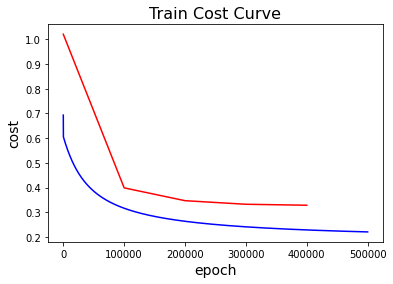

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.833520848187545
Epoch 100000 : train cost is 0.30785966121999436 , validation cost is 0.5167811459921597
Epoch 200000 : train cost is 0.250525672175496 , validation cost is 0.5108542082227486
Epoch 300000 : train cost is 0.2252618827712618 , validation cost is 0.5285961372958019
Epoch 400000 : train cost is 0.21071324618458723 , validation cost is 0.54975855352795
The accuracy on training set 7 is 0.9176470588235294


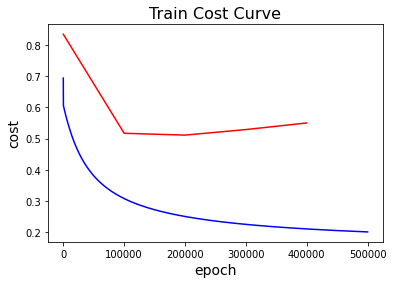

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 1.4046131663935981
Epoch 100000 : train cost is 0.32454852480490093 , validation cost is 0.3844722338203609
Epoch 200000 : train cost is 0.2750981823226765 , validation cost is 0.2805168340037119
Epoch 300000 : train cost is 0.25451293185516216 , validation cost is 0.23761982133373444
Epoch 400000 : train cost is 0.24328769640496006 , validation cost is 0.21426398718847053
The accuracy on training set 8 is 0.8941176470588236


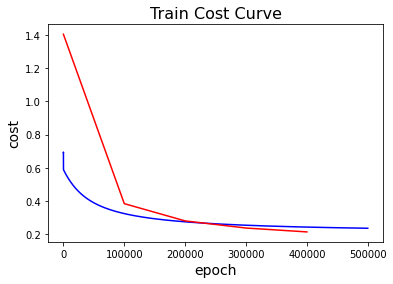

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.767712226863774
Epoch 100000 : train cost is 0.3294222223139118 , validation cost is 0.2714981359457093
Epoch 200000 : train cost is 0.27897037359024296 , validation cost is 0.20131040937250916
Epoch 300000 : train cost is 0.25862670684750344 , validation cost is 0.1695346203214437
Epoch 400000 : train cost is 0.24780555612294622 , validation cost is 0.15057923094558046
The accuracy on training set 9 is 0.8705882352941177


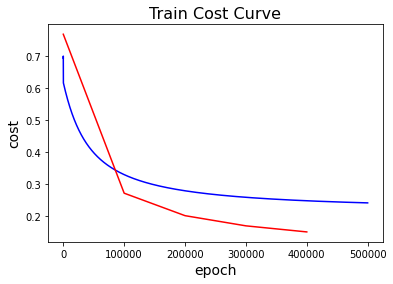

Epoch 0 : train cost is 0.6931471805599454 , validation cost is 0.47410692527834253
Epoch 100000 : train cost is 0.31013778853307195 , validation cost is 0.3845459339644652
Epoch 200000 : train cost is 0.25557965520733433 , validation cost is 0.375115219803404
Epoch 300000 : train cost is 0.23294785684703465 , validation cost is 0.3775607301845075
Epoch 400000 : train cost is 0.22054823717768574 , validation cost is 0.3823407097251999
The accuracy on training set 10 is 0.9058823529411765


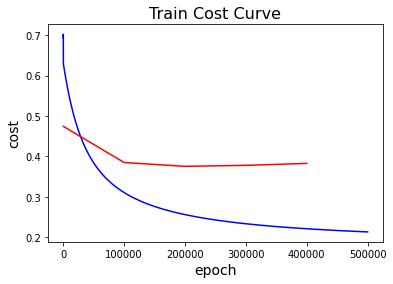

The average accuracy on all training set is 0.8923949579831933


In [11]:
# 10-fold cross validation, print the average accuracy
def cross_val(df,n):
  accuracy_list = []

  df_shuffled = df.iloc[np.random.permutation(len(df))]
  df_shuffled = pd.DataFrame(df_shuffled).to_numpy()

  for i in range(n):
    single_neuron = SingleNeuron()

    df_split = np.array_split(df_shuffled,n)
    validation = df_split[i]
    train = np.concatenate(df_split[:i] + df_split[i+1:])

    X_train, y_train = train[:,:-1], train[:,-1]
    X_val, y_val = validation[:,:-1], validation[:,-1]
     
    X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)
    y_train = y_train.flatten()
    X_val = np.concatenate((np.ones((X_val.shape[0],1)),X_val),axis=1)
    y_val = y_val.flatten()

    single_neuron.fit(X_train, y_train, X_val, y_val, with_noise=True)
    y_pred = single_neuron.predict(X_train)
    accuracy = accuracy_score(y_train.flatten(), y_pred)
    print('The accuracy on training set {} is {}'.format(i+1,accuracy))
    accuracy_list.append(accuracy)

    single_neuron.plot_cost()
    
  print('The average accuracy on all training set is {}'.format(np.mean(accuracy_list)))
    
cross_val(data,10)


#Interview question


*   Difference between logistic regression and single neuron with sigmoid
*   Difference between linear regression and single neuron with identity



Almost no different between the them. Both linear and logistic regression can be represented by the single neuron with different activation funciton.
